<a href="https://colab.research.google.com/github/pea-sys/Til/blob/master/tessa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tessa はyfinanceと pycoingeckoに基づいて構築されており、簡素化された統合インターフェイスを提供します

In [1]:
!pip install tessa

In [10]:
from tessa import Symbol, SymbolCollection, search

In [11]:
#MSFT のシンボルを作成し、いくつかの関数にアクセスします。
s1 = Symbol("MSFT")         # will use "yahoo" as the default source
s1.price_latest()

PricePoint(when=Timestamp('2024-03-01 05:00:00+0000', tz='UTC'), price=415.5, currency='USD')

In [12]:
#Yahoo Finance で使用されているブルームバーグ ティッカーから別のシンボルを作成します。
s2 = Symbol("SREN.SW")
s2.price_point("2022-06-30")    # get price at specific point in time

PricePoint(when=Timestamp('2022-06-29 22:00:00+0000', tz='UTC'), price=68.95055389404297, currency='CHF')

('2023-09-01',
 <Figure size 1600x800 with 1 Axes>,
 <Axes: title={'center': 'bitcoin'}, xlabel='date', ylabel='close'>)

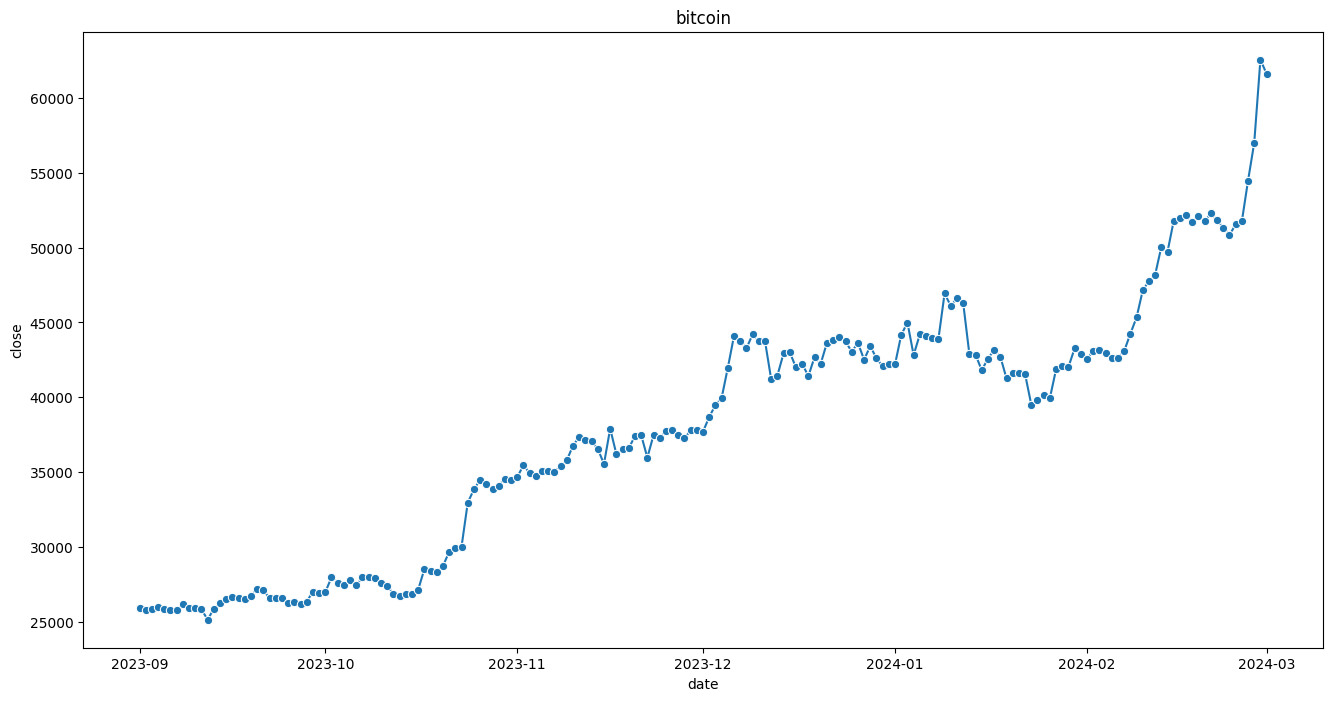

In [13]:
#coingecko で使用される ID を使用して、coingecko ソースからシンボルを作成します。
s3 = Symbol("bitcoin", source="coingecko")
s3.price_graph()

In [14]:
#coingecko でさらに暗号通貨ティッカーを検索します。
res = search("GAME")        # search and print search result summary
filtered = res.filter(source="coingecko")  # filter results
filtered.p()                # print summary of filtered results
filtered.buckets[0].symbols # review the best bucket in the filtered results
s4 = filtered.buckets[0].symbols[2]   # our symbol is the 3rd in that list
s4.price_history()          # get entire history

Search results for query 'GAME'

Bucket 0: Matches entire name or alias ⭐
  4 hits, 2 sources
  Hits: game, game, GAME, gtc
  Sources: yahoo, coingecko

Bucket 1: Matches word boundary
  93 hits, 2 sources
  Sources: yahoo, coingecko

Bucket 2: Matches in any way
  282 hits, 2 sources
  Sources: yahoo, coingecko

Bucket 3: Matches not (but was somehow still returned) 🤔
  17 hits, 1 sources
  Sources: yahoo


Search results for query 'GAME'
With filters: source=coingecko

Bucket 0: Matches entire name or alias ⭐
  3 hits, 1 sources
  Hits: game, game, gtc
  Sources: coingecko

Bucket 1: Matches word boundary
  35 hits, 1 sources
  Sources: coingecko

Bucket 2: Matches in any way
  93 hits, 1 sources
  Sources: coingecko

Bucket 3: Matches not (but was somehow still returned) 🤔
  No hits




PriceHistory(df=                              close
date                               
2017-12-28 00:00:00+00:00  0.003459
2017-12-29 00:00:00+00:00  0.004681
2017-12-30 00:00:00+00:00  0.004396
2017-12-31 00:00:00+00:00  0.003842
2018-01-01 00:00:00+00:00  0.003523
...                             ...
2024-02-27 00:00:00+00:00  0.000612
2024-02-28 00:00:00+00:00  0.000601
2024-02-29 00:00:00+00:00  0.000593
2024-03-01 00:00:00+00:00  0.000546
2024-03-01 17:51:20+00:00  0.000573

[2257 rows x 1 columns], currency='USD')

('2023-09-01',
 <Figure size 1600x800 with 1 Axes>,
 <Axes: title={'center': 'SREN.SW'}, xlabel='date', ylabel='close'>)

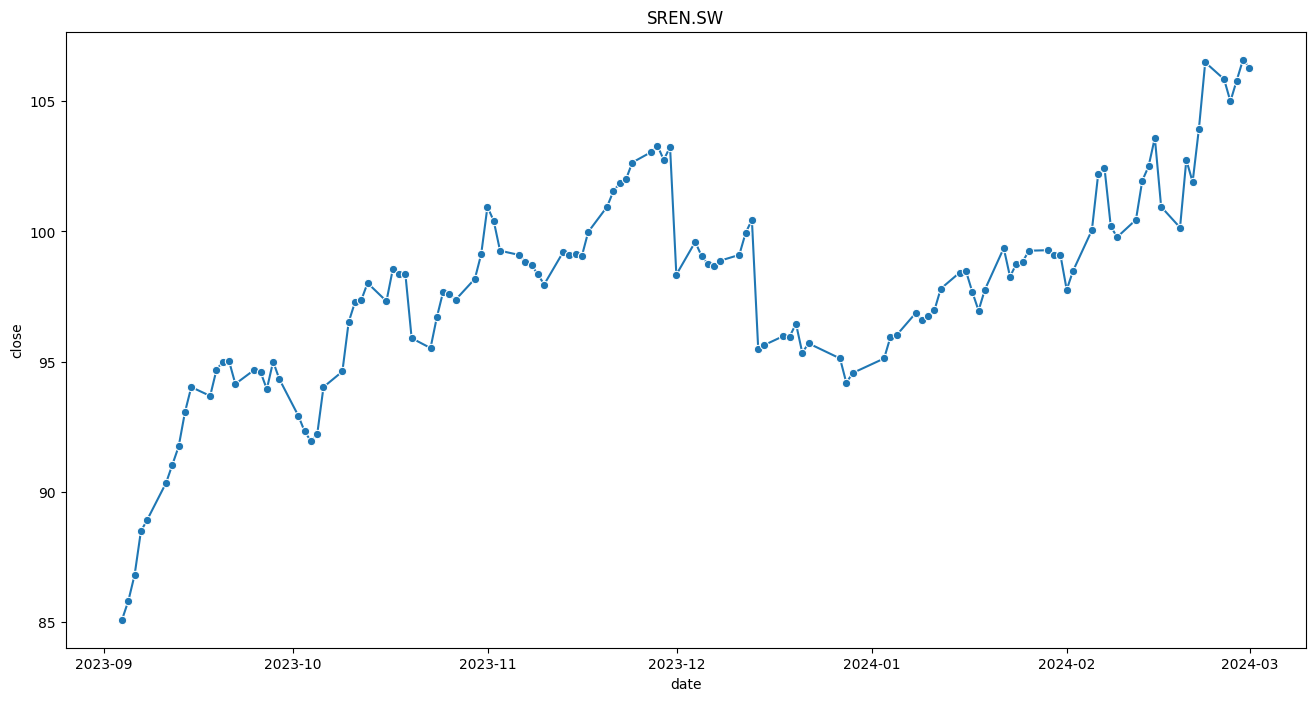

In [15]:
#いくつかのシンボルのコレクションを構築し、そのコレクションを使用してシンボルを取得します。
sc = SymbolCollection([s1, s2, s3, s4])
sc.add(Symbol("AAPL"))      # add another one
sc.find_one("SREN").price_graph()

In [16]:
#シンボル コレクションを保存およびロードします。
sc.save_yaml("my_symbols.yaml")
sc_new = SymbolCollection()
sc_new.load_yaml("my_symbols.yaml")

In [17]:
#別の通貨設定を使用します。
sc.find_one("game").price_latest()  # will return price in USD
Symbol.currency_preference = "CHF"
sc.find_one("game").price_latest()  # will return price in CHF

PricePoint(when=Timestamp('2024-03-01 23:57:10+0000', tz='UTC'), price=0.0005183618034898084, currency='CHF')

### Price

In [2]:
 from tessa import price_history, price_point, price_latest

In [3]:
df, currency = price_history("AAPL")

In [4]:
price_point("SAP.DE", "2015-01-01")         # will return price at 2015-01-02

PricePoint(when=Timestamp('2015-01-01 23:00:00+0000', tz='UTC'), price=51.2855224609375, currency='EUR')

In [6]:
price_latest("ethereum", source="coingecko", currency_preference="CHF")

PricePoint(when=Timestamp('2024-03-01 23:20:23+0000', tz='UTC'), price=3045.4184487102925, currency='CHF')

In [7]:
price_latest("ETH-EUR", source="yahoo")

PricePoint(when=Timestamp('2024-03-02 00:00:00+0000', tz='UTC'), price=3165.408203125, currency='EUR')

### tessa.search

In [10]:
from tessa import search

In [11]:
r = search("roche")

Search results for query 'roche'

Bucket 0: Matches entire name or alias ⭐
  No hits

Bucket 1: Matches word boundary
  32 hits, 1 sources
  Sources: yahoo

Bucket 2: Matches in any way
  28 hits, 2 sources
  Sources: yahoo, coingecko

Bucket 3: Matches not (but was somehow still returned) 🤔
  3 hits, 1 sources
  Hits: ROCH, ROCHU, ROCHW
  Sources: yahoo




In [12]:
r.p()

Search results for query 'roche'

Bucket 0: Matches entire name or alias ⭐
  No hits

Bucket 1: Matches word boundary
  32 hits, 1 sources
  Sources: yahoo

Bucket 2: Matches in any way
  28 hits, 2 sources
  Sources: yahoo, coingecko

Bucket 3: Matches not (but was somehow still returned) 🤔
  3 hits, 1 sources
  Hits: ROCH, ROCHU, ROCHW
  Sources: yahoo




In [15]:
r.filter(exchange="EBS").symbols    # filter and get list of resulting symbols

[]

In [16]:
r = search("jenny")                 # another search

Search results for query 'jenny'

Bucket 0: Matches entire name or alias ⭐
  No hits

Bucket 1: Matches word boundary
  1 hits, 1 sources
  Hits: UJENNY-USD
  Sources: yahoo

Bucket 2: Matches in any way
  2 hits, 2 sources
  Hits: jco, JCO-USD
  Sources: yahoo, coingecko

Bucket 3: Matches not (but was somehow still returned) 🤔
  No hits




In [17]:
r.filter(source="coingecko").symbols # filter for source (i.e., yahoo or coingecko)

[Symbol(name='jco', query='jennyco', source='coingecko', aliases=['jennyco', 'JennyCo'])]

In [18]:
r = search("carbon")

Search results for query 'carbon'

Bucket 0: Matches entire name or alias ⭐
  1 hits, 1 sources
  Hits: carbon
  Sources: coingecko

Bucket 1: Matches word boundary
  526 hits, 2 sources
  Sources: yahoo, coingecko

Bucket 2: Matches in any way
  21 hits, 2 sources
  Sources: yahoo, coingecko

Bucket 3: Matches not (but was somehow still returned) 🤔
  No hits




In [19]:
 r.filter(source="yahoo", type="ETF").symbols

[Symbol(name='2642.T', query='2642.T', source='yahoo', aliases=['SUMITOMO MITSUI TRUST AM CARBON']),
 Symbol(name='375770.KS', query='375770.KS', source='yahoo', aliases=['KODEX Carbon Efficient Green Ne']),
 Symbol(name='376410.KS', query='376410.KS', source='yahoo', aliases=['TIGER CARBON EFFICIENT']),
 Symbol(name='400590.KS', query='400590.KS', source='yahoo', aliases=['SOL ICE Global Carbon']),
 Symbol(name='401590.KS', query='401590.KS', source='yahoo', aliases=['HANARO Global Carbon Futures (S']),
 Symbol(name='BTCC-J.TO', query='BTCC-J.TO', source='yahoo', aliases=['PURPOSE BITCOIN CARBON OFFSET E']),
 Symbol(name='CARB.MI', query='CARB.MI', source='yahoo', aliases=['WISDOMTREE CARBON']),
 Symbol(name='CARB.TO', query='CARB.TO', source='yahoo', aliases=['HORIZONS CARBON CREDITS ETF']),
 Symbol(name='CBON-U.NE', query='CBON-U.NE', source='yahoo', aliases=['NINEPOINT CARBON CREDIT ETF']),
 Symbol(name='CBON.NE', query='CBON.NE', source='yahoo', aliases=['NINEPOINT CARBON CREDIT E

In [20]:
r = search("harmony")

# Review results:
r.p()

# Get the 1 symbol from source "coingecko" in the best bucket (i.e., bucket 0):
s = r.filter(source="coingecko").buckets[0].symbols[0]
s.price_latest()

Search results for query 'harmony'

Bucket 0: Matches entire name or alias ⭐
  1 hits, 1 sources
  Hits: one
  Sources: coingecko

Bucket 1: Matches word boundary
  107 hits, 2 sources
  Sources: yahoo, coingecko

Bucket 2: Matches in any way
  3 hits, 1 sources
  Hits: 7EW.F, 7EW.MU, NO0010921299.SG
  Sources: yahoo

Bucket 3: Matches not (but was somehow still returned) 🤔
  No hits


Search results for query 'harmony'

Bucket 0: Matches entire name or alias ⭐
  1 hits, 1 sources
  Hits: one
  Sources: coingecko

Bucket 1: Matches word boundary
  107 hits, 2 sources
  Sources: yahoo, coingecko

Bucket 2: Matches in any way
  3 hits, 1 sources
  Hits: 7EW.F, 7EW.MU, NO0010921299.SG
  Sources: yahoo

Bucket 3: Matches not (but was somehow still returned) 🤔
  No hits




PricePoint(when=Timestamp('2024-03-02 00:22:01+0000', tz='UTC'), price=0.025860977580084724, currency='USD')